# Recurrent neural nets

## Simple numpy implementation of a RNN 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import LSTM

In [2]:
timesteps = 100
input_features = 32
output_features = 64

# Define signals.
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
# Define weights.
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
# Run loop.
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    # Update state.
    state_t = output_t
final_output_sequence = np.asarray(successive_outputs)

Use Keras RNN layers on IMDB data.

In [3]:
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(f"{len(input_train)} train sequences")
print(f"{len(input_test)} test sequences")

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print(f"input_train \tshape:{input_train.shape}")
print(f"input_test \tshape:{input_test.shape}")
      

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train 	shape:(25000, 500)
input_test 	shape:(25000, 500)


In [38]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 809us/step - loss: 0.6461 - acc: 0.6090 - val_loss: 0.5079 - val_acc: 0.7792
Epoch 2/10
20000/20000 [==============================] - 15s 738us/step - loss: 0.4458 - acc: 0.8037 - val_loss: 0.4315 - val_acc: 0.8122
Epoch 3/10
20000/20000 [==============================] - 15s 737us/step - loss: 0.3224 - acc: 0.8703 - val_loss: 0.3494 - val_acc: 0.8552
Epoch 4/10
20000/20000 [==============================] - 15s 741us/step - loss: 0.2445 - acc: 0.9040 - val_loss: 0.3692 - val_acc: 0.8398
Epoch 5/10
20000/20000 [==============================] - 15s 734us/step - loss: 0.1923 - acc: 0.9265 - val_loss: 0.3679 - val_acc: 0.8660
Epoch 6/10
20000/20000 [==============================] - 15s 730us/step - loss: 0.1341 - acc: 0.9515 - val_loss: 0.4662 - val_acc: 0.8052
Epoch 7/10
20000/20000 [==============================] - 15s 729us/s

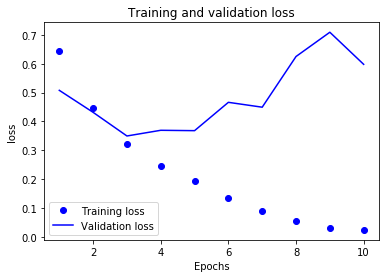

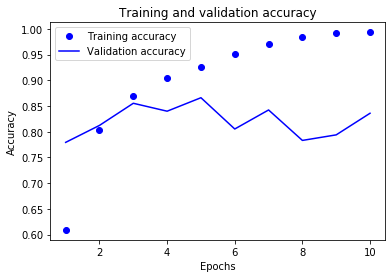

In [39]:
def plot_history(history):
    def plot_history_record(history, record, *args, **kwargs):
        values = history.history[record]
        epochs = range(1, len(values) + 1)
        plt.plot(epochs, values, *args, **kwargs)

    plot_history_record(history, 'loss', 'bo', label='Training loss')
    plot_history_record(history, 'val_loss', 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.figure()
    plot_history_record(history, 'acc', 'bo', label='Training accuracy')
    plot_history_record(history, 'val_acc', 'b', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
plot_history(history)

This approach proved worse than a stack of densly connected layers. This is because we look at less words and because simple rnns dont work good on long sequences.

## LSTM network

In [8]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.5227 - acc: 0.7543 - val_loss: 0.3617 - val_acc: 0.8658
Epoch 2/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.2967 - acc: 0.8836 - val_loss: 0.4094 - val_acc: 0.8282
Epoch 3/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.2408 - acc: 0.9087 - val_loss: 0.3834 - val_acc: 0.8272
Epoch 4/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.2028 - acc: 0.9257 - val_loss: 0.3074 - val_acc: 0.8872
Epoch 5/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.1785 - acc: 0.9342 - val_loss: 0.4128 - val_acc: 0.8322
Epoch 6/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.1637 - acc: 0.9412 - val_loss: 0.2964 - val_acc: 0.8754
Epoch 7/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.1428 - acc: 0.9491 - val_loss: 0.3704 - val_acc:

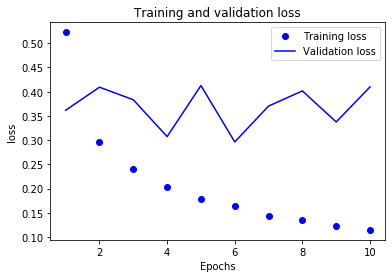

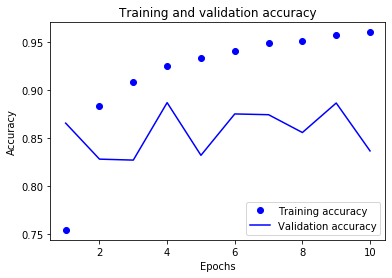

In [10]:
plot_history(history)

LSTM is beter than RNN but not significantly this is because thisproblem does not require its strengts in remembering previous data in a significant degree.